## Sentiment Analysis

**Sentiment Analysis is a sub field of NLP that tries to identify the sentiment conveyed through a text. Sentiment analysis helps company in their decision making process.**

**Here we are performing sentiment analysis on movies reviews.**

**The 2,000 record IMDb movie review database is accessible through NLTK directly with**

*from nltk.corpus import movie_reviews*

**However, since we already have it in a tab-delimited file we'll use that instead.**

In [1]:
#importing all the necessary libraries
import nltk
import pandas as pd
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#loading the dataset
df = pd.read_csv(r'TextFiles/moviereviews.tsv', sep = '\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
label     2000 non-null object
review    1965 non-null object
dtypes: object(2)
memory usage: 31.3+ KB


In [4]:
#checking for null values
df.isnull().sum()

label      0
review    35
dtype: int64

In [5]:
#dropping the NA values
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [7]:
#checking reviews having blank spaces(empty string) and removing them as well

#starting with an empty list
blanks= []

for i, lb, rev in df.itertuples():#iterate over the dataframe
    if type(rev) == str: #checking for string datatype
        if rev.isspace(): #testing 'review' for whitespace
            blanks.append(i) #adding the matching index no. to the list

#dropping all the rows that has been appended into 'blanks'
df.drop(blanks, inplace=True)

In [8]:
len(df)

1938

Now we are left with 1938 rows in the dataset.

In [9]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [11]:
df.groupby('label').describe()

review                                                               
       count unique                                                top freq
label                                                                      
neg      969    969  you know the plot : a dimwit with a shady past...    1
pos      969    969  on april 12th , 1912 , the most astonishing sh...    1

In [12]:
df['length'] = df['review'].apply(len)

In [13]:
df.length.describe()

count     1938.000000
mean      3889.938080
std       1695.386131
min         92.000000
25%       2754.250000
50%       3631.000000
75%       4700.000000
max      15016.000000
Name: length, dtype: float64

In [14]:
df[df['length'] == 15016]['review'].iloc[0]

'note : some may consider portions of the following text to be spoilers . \r\nbe forewarned . \r\nlike its own opening shot , from out of the darkness boogie nights triumphantly explodes upon the film scene with stunning authority and clarity , persuasively heralding its helmer paul thomas anderson as a bonafide major talent . \r\na sprawling epic set in the heart of the disco era and focused upon the ascension and decline of a troupe in the adult film industry , boogie nights is an astonishingly ambitious feature film which is completely effective both as an utterly entertaining joyride and as a strikingly impressive piece of filmmaking . \r\nthe film follows a soft-spoken young man , eddie adams ( mark wahlberg ) from torrance , through his induction into the erotic picture business to stardom , and later , to a harrowingly precipitous drop . \r\nas boogie nights opens , he\'s toiling as a dishwasher in a trendy san fernando valley nightclub , and living at home under the thumb of a 

From the above output we can see that there are equal numbers of negative and positive reviews.

We will now clean the data by:
* Removing punctuations
* Removing all stopwords
* and Return a corpus of cleaned text

In [15]:
def text_clean(rev):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in rev if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    nopunc =  [w for w in nopunc.split() if w.lower() not in (stopwords.words('english'))]
    nopunc = ' '.join(nopunc)
    return nopunc

In [16]:
df["review"].head().apply(text_clean)

0    films like mouse hunt get theatres isnt law so...
1    talented actresses blessed demonstrated wide a...
2    extraordinary year australian films shine scoo...
3    according hollywood movies made last decades l...
4    first press screening 1998 already ive gotten ...
Name: review, dtype: object

In [17]:
df['review'] = df['review'].apply(text_clean)

In [18]:
df.head()

,label,review,length
0,neg,films like mouse hunt get theatres isnt law so...,2250
1,neg,talented actresses blessed demonstrated wide a...,3503
2,pos,extraordinary year australian films shine scoo...,3869
3,pos,according hollywood movies made last decades l...,5584
4,neg,first press screening 1998 already ive gotten ...,4327


In [19]:
df[df['length'] == 92]['review'].iloc[0]

'film extraordinarily horrendous im going waste words'

In [21]:
df.describe()

,length
count,1938.000000
mean,3889.938080
std,1695.386131
min,92.000000
25%,2754.250000
50%,3631.000000
75%,4700.000000
max,15016.000000


In [22]:
df['review'][0]

'films like mouse hunt get theatres isnt law something diabolical load claptrap steven speilbergs dreamworks studio hollywood family fare deadly worst mouse hunt takes bare threads plot tries prop overacting flatout stupid slapstick makes comedies like jingle way look decent comparison writer adam rifkin director gore verbinski names chiefly responsible swill plot worth concerns two brothers nathan lane appalling lee evens inherit poorly run string factory seemingly worthless house eccentric father deciding check longabandoned house soon learn worth fortune set selling auction highest bidder battling every turn smart mouse happy rundown little abode wanting stay way story alternates unfunny scenes brothers bickering inheritance endless action sequences two take increasingly determined furry foe whatever promise film starts soon deteriorates boring dialogue terrible overacting increasingly uninspired slapstick becomes sound fury signifying nothing script becomes unspeakably bad best lin

## NLTK's VADER Module

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
VADER is an NLTK module that provides sentiment scores based on words used ("completely" boosts a score, while "slightly" reduces it), on capitalization & punctuation ("GREAT!!!" is stronger than "great."), and negations (words like "isn't" and "doesn't" affect the outcome).

VADER's SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:

* negative
* neutral
* positive
* compound 

where the values for each falls between 0 and 1, and compund is the normalized score of the other three mentioned scores.
Therefore a compound score of 0 would be completely neutral, a compound score above 0 indicates some sort of positive score and a compound score below 0 indicates negative score.

It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [24]:
sia = SentimentIntensityAnalyzer()

In [25]:
#creating three different columns depicting the VADER score, the coumpound score and the compound label(i.e., positive or negative) respectively
df['scores'] = df['review'].apply(lambda review: sia.polarity_scores(review))

df['compound'] = df['scores'].apply(lambda score: score['compound'])

df['comp_score'] = df['compound'].apply(lambda x: 'pos' if x>=0 else 'neg')

In [26]:
df.head()

,label,review,length,scores,compound,comp_score
0,neg,films like mouse hunt get theatres isnt law so...,2250,"{'neg': 0.167, 'neu': 0.665, 'pos': 0.168, 'co...",-0.4215,neg
1,neg,talented actresses blessed demonstrated wide a...,3503,"{'neg': 0.178, 'neu': 0.668, 'pos': 0.154, 'co...",-0.8996,neg
2,pos,extraordinary year australian films shine scoo...,3869,"{'neg': 0.116, 'neu': 0.642, 'pos': 0.241, 'co...",0.9952,pos
3,pos,according hollywood movies made last decades l...,5584,"{'neg': 0.115, 'neu': 0.683, 'pos': 0.202, 'co...",0.9944,pos
4,neg,first press screening 1998 already ive gotten ...,4327,"{'neg': 0.162, 'neu': 0.696, 'pos': 0.142, 'co...",-0.8947,neg


We'll now use scikit learn to determine how close VADER predicts the score as compared to our original data.

In [27]:
print(accuracy_score(df['label'], df['comp_score']))

0.6171310629514963


It looks like VADER couldn't analyse the movie reviews very accurately. This demonstrates one of the biggest challenges in sentiment analysis - understanding human semantics.

## Splitting the data into training and test data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df['review']
y = df['label']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## Building pipeline to vectorize the data, then train and fit the model

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

**Creating Pipeline with Naive Bayes classifier**

In [32]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                        ('clf', MultinomialNB())])

In [33]:
text_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [34]:
predict1 = text_clf_nb.predict(X_test)

**Creating pipeline with SVM classifier**

In [35]:
text_clf_svm = Pipeline([('tfidf',TfidfVectorizer()),
                                        ('clf', LinearSVC())])

In [36]:
text_clf_svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [37]:
predict2 = text_clf_svm.predict(X_test)

## Evaluating the Model

In [38]:
print("~MultinomialNB~\n")
print(confusion_matrix(y_test, predict1))
print(classification_report(y_test, predict1))
print('Accuracy Score:', accuracy_score(y_test, predict1))

~MultinomialNB~

[[163  31]
 [ 48 146]]
              precision    recall  f1-score   support

         neg       0.77      0.84      0.80       194
         pos       0.82      0.75      0.79       194

   micro avg       0.80      0.80      0.80       388
   macro avg       0.80      0.80      0.80       388
weighted avg       0.80      0.80      0.80       388

Accuracy Score: 0.7963917525773195


In [39]:
print("~SVM~\n")
print(confusion_matrix(y_test, predict2))
print(classification_report(y_test, predict2))
print('Accuracy Score:', accuracy_score(y_test, predict2))

~SVM~

[[163  31]
 [ 31 163]]
              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       194
         pos       0.84      0.84      0.84       194

   micro avg       0.84      0.84      0.84       388
   macro avg       0.84      0.84      0.84       388
weighted avg       0.84      0.84      0.84       388

Accuracy Score: 0.8402061855670103


It seems that the SVM classifier has given better accuracy of 84% as compared to Naive Bayes with accuracy of 79%

**Generating WordCloud to visualize the frequency of words that has been** 

In [40]:
text = " ".join(rev for rev in df.review)

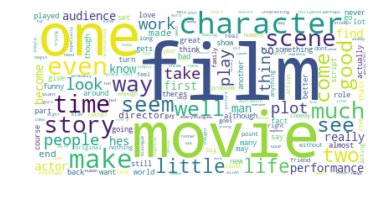

In [41]:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
review = "This movie was pathetic"
print(text_clf_nb.predict([review]))

['neg']
